# MGTA-611 Deep Learning Notebook - Fraud Transcation on credit card
## By Albert Yu

### In this notebook, we investigate fraud transactions on credit cards using data science techniques as well as deep learning techniques.  The analysis is carried out in the context of MGTA-611, with the goal of demonstrating the application of data science methodologies in real-world dataset.

### MGTA611 - Winter 2023

## Contents
- Introduction
- Description of the data
- Data preparation
- Data exploration and data visualization
- Balance the data
- Building the baseline SVM model(i.e. Traditional Method)
- Building the deep learning model
- Trying to improve the deep learning model
- Conlusion and comparison

## 1 Description of the technical problem

Credit card fraud is a significant problem faced by financial institutions, businesses, and consumers worldwide. This type of fraud involves the unauthorized use of credit card data for illegitimate transactions, leading to substantial financial losses and undermining consumer trust in the payment ecosystem. As the world becomes increasingly reliant on digital payment methods, the incidence of credit card fraud continues to rise. Therefore, it is essential for businesses and financial institutions to have robust fraud detection systems in place to minimize financial losses and maintain customer confidence.

The technical challenge in detecting credit card fraud lies in accurately identifying the relatively small percentage of fraudulent transactions amidst the vast volume of legitimate ones. Traditional fraud detection methods, such as rule-based systems, can be limited in their ability to adapt to changing fraud patterns and may generate a high number of false alarms.

To address this issue, our project applies machine learning and deep learning techniques, specifically support vector machine (SVM) classification, TensorFlow, and Keras. We aim to maximize sensitivity, ensuring that as many fraudulent transactions as possible are identified, while minimizing false positives to reduce the burden on businesses and customers.

The SVM classifier is a popular machine learning algorithm used for classification and regression tasks. It is especially suitable for handling high-dimensional datasets and can effectively separate classes by finding the optimal hyperplane that maximizes the margin between them. In this project, we first use the SVM classifier to predict fraudulent transactions, creating a baseline model.

Following this, we employ deep learning techniques, leveraging the power of TensorFlow and Keras, two widely-used libraries for building neural network models. TensorFlow provides a flexible platform for machine learning and deep learning, while Keras is a high-level API that simplifies the process of creating and training neural networks.

By comparing the results of these different approaches, we seek to determine the most effective method for detecting credit card fraud. Our ultimate goal is to provide businesses and financial institutions with a robust, adaptable solution that can protect them and their customers from the growing threat of credit card fraud, ensuring secure and trustworthy digital payment systems.

## 2 Description of the data


Dataset contains only numerical input variables. 

Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
The feature 'Amount' is the transaction Amount.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The remaining features, V1 through V28, are obtained through principal component analysis (PCA) and do not have associated column names. 

The only features which have not been transformed with PCA are 'Time' and 'Amount'.

## 3 Data Preparation

In [1]:
#Importing librairies

import pandas as pd 
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import seaborn as sns



In [2]:
# Read data and transform the data in pandas dataframe

data = pd.read_csv('creditcard.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 4 Data exploration and data visualization

In [4]:
df.describe() 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Remove duplicate and null values

print('Number of duplicated values: ', df.duplicated().sum())
df = df.drop_duplicates()

print('Number of missing values: ', df.isnull().sum())
df = df.dropna()

Number of duplicated values:  1081
Number of missing values:  Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


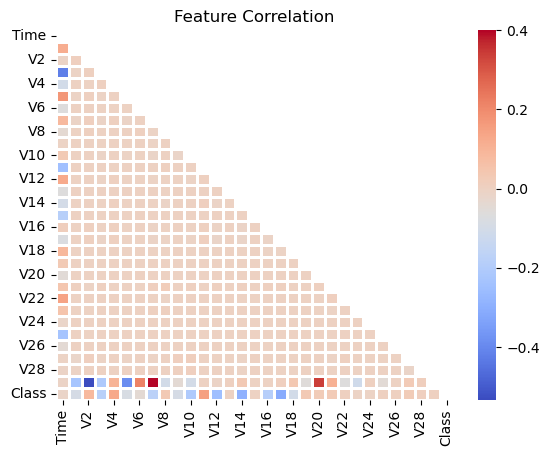

In [6]:
# All Feature correlations 
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask = mask,  cmap="coolwarm",linewidths = 0.8, fmt='.2f')
plt.title('Feature Correlation')
plt.show()

## Conclusion from the feature correlation graph
Based on the plot, it can be observed that there is a high correlation between the 'Amount' feature and the 'V7' and 'V20'. 
This suggests that there may be a relationship between the 'Amount' feature and the 'V7' and 'V20' featurr

## Determine the correlation between the 'Class' feature and the other features 

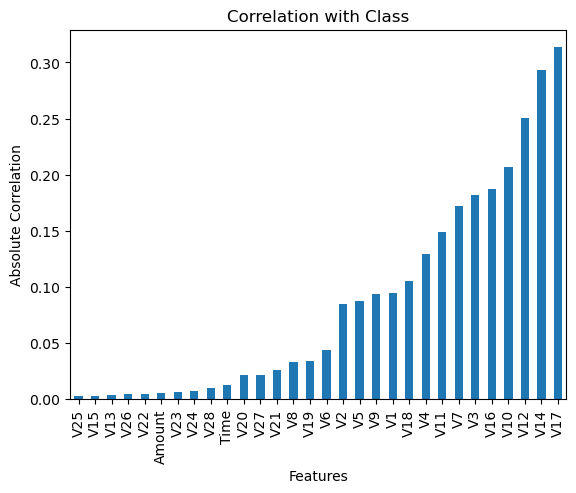

In [7]:


# calculate the absolute correlation between features and target variable
correlations = df.corr()['Class'][:-1].abs().sort_values()

# create a bar plot of the correlations
ax = correlations.plot(kind='bar')
ax.set_title('Correlation with Class')
ax.set_xlabel('Features')
ax.set_ylabel('Absolute Correlation')

# display the plot
plt.show()


## Obervation from the 'correlation with class' graph

The graph generated by the previous code shows the absolute correlation between each feature and the 'Class' feature in the dataset. 
Based on the graph, it can be observed that the 'V17', 'V14', and 'V12' features are the three most highly correlated features to the 'Class' feature. 

## Check the balance of data

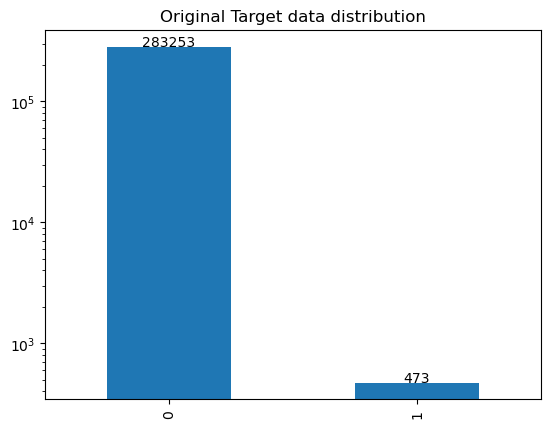

In [8]:
# Is the data balanced? (Is number of rows with class 0 close to number of rows with class1?)

value_counts = df['Class'].value_counts()

# create the bar plot
ax = value_counts.plot(kind='bar')
ax.set_yscale('log')
ax.set_title('Original Target data distribution')

# add labels to the bars
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), color='black', ha='center')

# display the plot
plt.show()


## Deal with the unbalanced data
The distribution of the dataset is imbalanced, with 99.8% (283253) of transactions labeled as real and 
only 0.2% (473) of transactions labeled as fraud. This indicates that if a model were to classify every 
transaction as real, it would achieve an accuracy of 99.8%. However, such a model would be ineffective 
at identifying fraudulent transactions, which are the primary focus of this analysis.

To address this issue, we need to ensure that the number of real transactions is closer to the number of 
fraud transactions. This can be achieved by sampling the real transactions, thereby reducing their number 
and creating a more balanced dataset. In later steps, we will use this approach to obtain a representative 
sample of the real transactions and develop a model that can accurately classify both real and fraudulent transactions.

In [9]:
# Train test split
# split the dataset into training and testing sets

SPLIT_INDEX = 0.8
df_index = int(len(df) * SPLIT_INDEX)
train = df[:df_index]
test = df[df_index:]

C:\Users\P12A741\AppData\Local\Temp\ipykernel_27924\2630476616.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


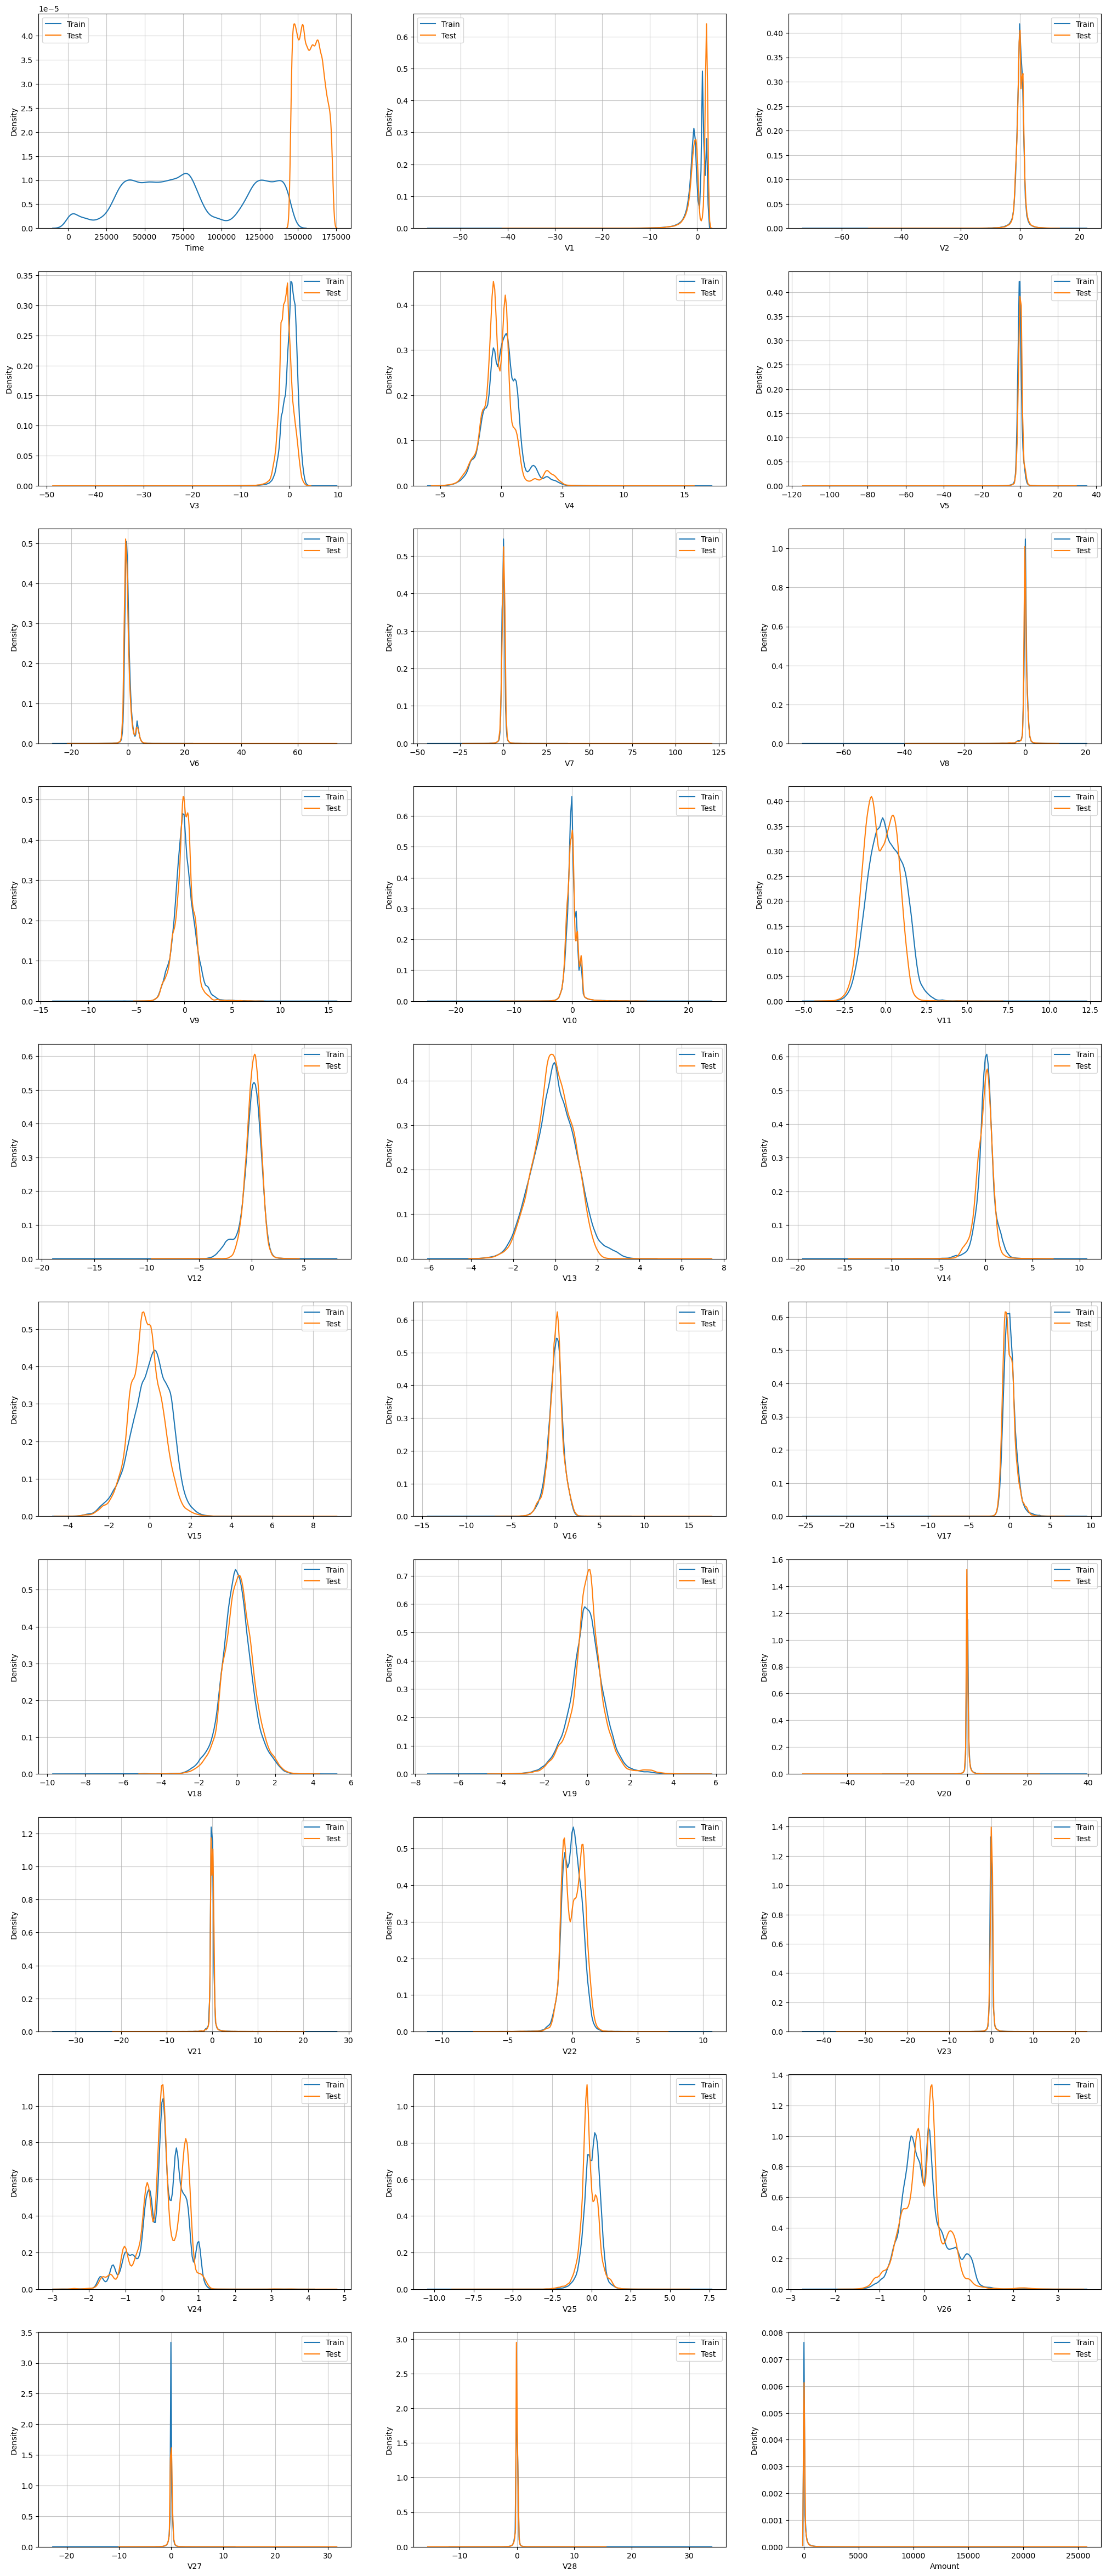

In [10]:
# Ensure train and test data have similar distribution
pcl_columns = (list(train.loc[:, 'Time':'Amount']))

figure = plt.figure(figsize=(25, 60))

ROWS = 10
COLUMNS = 3

for id, number in enumerate(pcl_columns[:30]):
    ax = figure.add_subplot(ROWS, COLUMNS, id+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = number, data = train, label = "Train")
    sns.kdeplot(x = number, data = test, label = "Test")      
    ax.set_xlabel(number)
    ax.legend()

figure.show()


## Observation of the line charts
Based on the line charts, it can be observed that the distribution patterns of features 'V1' through 'V28' 
 and the 'Amount' feature in both the training and testing sets are very similar. This indicates that both 
 splits are good representatives of the overall dataset and can be used effectively to train and evaluate the model.

In [11]:
# Deal with the not balanced data by sampling the non-fraud cases in the train set

# seperare the fraud and non-fraud data in the train set
train_fraud = train[train['Class'] == 1]
train_nonfraud = train[train['Class'] == 0]

In [12]:
len(train_fraud)
# There are 399 fraud cases in the train set, so that we need to allocate a simliar number of fraud cases to the train set
# to ensure that the model is effectively trained and evaluated on a balanced dataset that accurately represents the 
# distribution of the target variable.

399

In [13]:
# sample non-fraud cases to match the number of fraud cases
nonfraud_sample = train_nonfraud.sample(len(train_fraud))

# concatenate the fraud and non-fraud samples into a balanced training dataset
train_balanced = pd.concat([train_fraud, nonfraud_sample])

# shuffle the rows of the balanced training dataset
train_balanced = train_balanced.sample(frac=1, random_state=42)
train_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
94079,64718.0,0.736670,0.405475,-1.868314,-0.489575,2.050012,3.310536,0.289252,0.602315,-0.157218,...,0.014308,-0.068119,0.223129,1.026635,-0.666385,0.234885,-0.295525,-0.175749,86.20,0
92065,63757.0,1.130692,0.337064,0.315148,1.177202,-0.033504,-0.517861,0.305684,-0.099597,-0.218434,...,-0.423168,-1.311325,0.229731,0.003288,0.166217,-0.812970,0.021434,0.031789,36.00,0
15225,26585.0,-19.856322,12.095893,-22.464083,6.115541,-15.148022,-4.346724,-15.648507,13.276805,-3.974162,...,1.750730,-1.409636,-0.809809,0.121397,1.350300,-0.224292,1.597621,0.476920,99.99,1
152910,97567.0,-0.936458,1.821590,-0.850474,-0.465904,0.361556,-0.589212,0.296939,0.498126,1.146445,...,0.243401,1.199842,-0.006956,0.739151,-0.697047,-0.329895,0.272265,0.086838,0.89,0
15506,26899.0,-21.885434,12.930505,-24.098872,6.203314,-16.466099,-4.459842,-16.519836,14.535565,-3.897022,...,1.762232,-1.579055,-0.951043,0.134565,1.507110,-0.222671,1.527655,0.453699,99.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15781,27219.0,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99,1
41395,40662.0,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1
144108,85867.0,-3.586964,2.609127,-5.568577,3.631947,-4.543590,-0.157899,-4.089128,2.417305,-3.239901,...,1.024423,0.428756,0.182032,-0.534598,0.168933,-0.149844,0.685517,-0.299728,310.42,1
223784,143522.0,-0.153121,1.093714,-0.633573,-0.790079,1.216534,-0.273466,0.815858,0.081233,-0.131485,...,-0.335383,-0.766329,0.051369,0.122629,-0.355607,0.126277,0.331056,0.136680,3.59,0


## 5 Balance the data

In [14]:
# Drop the Time and Class features to create the features dataframe
x_train = train_balanced.drop(['Time', 'Class'],axis=1) 

# create the labels series
y_train = train_balanced['Class']

# convert the features and labels to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [15]:
# We don't need to sample the test set

# create the labels series
x_test = test.drop(['Time', 'Class'],axis=1)
y_test = test['Class']

# convert the features and labels to numpy arrays
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [16]:
# Get prediciton result

# Create an SVM classifier with a linear kernel (the default SVM Classifier has a kernel of Radial Basis Function)
svm_classifier = svm.SVC()

# Train the classifier on the balanced training dataset
svm_classifier.fit(x_train, y_train)

# Use the trained classifier to predict the test dataset
svm_trained = svm_classifier.predict(x_test)

# Calculate the confusion matrix using the predicted labels and the true labels
result_matrix = confusion_matrix(y_test, svm_trained)

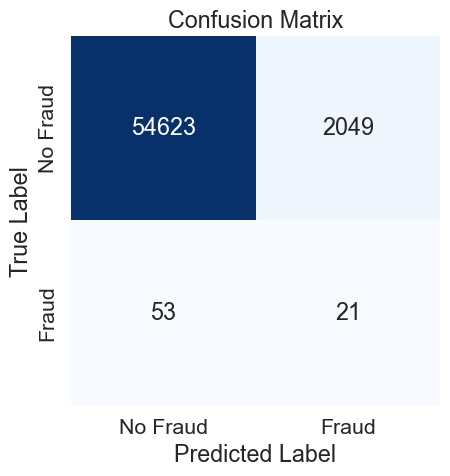

In [17]:
# Plot the confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(result_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, square=True, xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# extract the true positives, true negatives, false positives, and false negatives from the confusion matrix
TN, FP, FN, TP = result_matrix.ravel()

# calculate the accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.96


In [19]:
# calculate the specifity
sensitivity = (TP) / (TP + FN)
print('Sensitivity: {:.2f}'.format(sensitivity))

Sensitivity: 0.28


In [20]:
# The SVM model achieved an accuracy of 50%, indicating that it is able to classify 
# the dataset and distinguish some of the cases between instances of fraud and non-fraud.

# 6 Building the deep learning model

Import libraries for deep learning model

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

In [22]:
# Normalize the 'Amount' feature using StandardScaler
# StandardScaler standardizes the features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled[:, -1] = scaler.fit_transform(x_train[:, -1].reshape(-1, 1)).flatten()
x_test_scaled[:, -1] = scaler.transform(x_test[:, -1].reshape(-1, 1)).flatten()

In [23]:
# Define the deep learning model architecture
# Create a sequential model to stack layers on top of each other
model = Sequential([
    # First hidden layer with 32 neurons and ReLU activation function
    Dense(32, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    # Dropout layer to prevent overfitting by randomly setting some input units to 0 during training
    Dropout(0.2),
    # Second hidden layer with 16 neurons and ReLU activation function
    Dense(16, activation='relu'),
    # Dropout layer to prevent overfitting
    Dropout(0.2),
    # Third hidden layer with 8 neurons and ReLU activation function
    Dense(8, activation='relu'),
    # Output layer with a single neuron and sigmoid activation function to produce probabilities
    Dense(1, activation='sigmoid')
])

In [24]:
# Compile the model by specifying the optimizer, loss function, and evaluation metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Train the model
# Use validation_split to separate a portion of the training data for validation
# The model will be trained for 50 epochs with a batch size of 64
history = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=64, verbose=0)

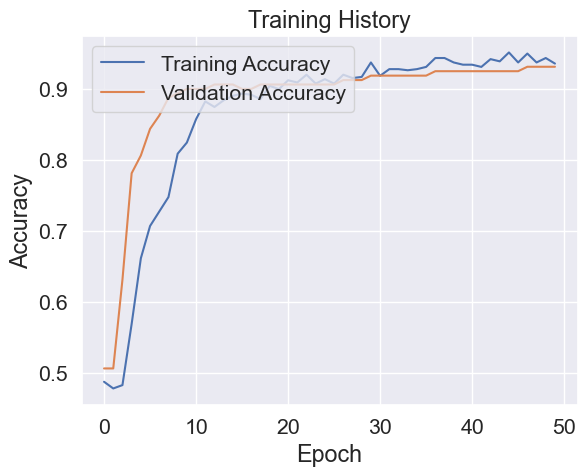

In [26]:
# Plot the training history
# Display the accuracy of the model on the training set and validation set over each epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [27]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print(f'Test Accuracy: {test_acc:.2f}')

Test Accuracy: 0.97


In [28]:
# Get predictions from the deep learning model
# Convert the predicted probabilities to binary class labels (0 or 1)
y_pred = (model.predict(x_test_scaled) > 0.5).astype("int32")

1774/1774 [==============================] - 1s 760us/step


In [29]:
# Generate classification report for deep learning model
# The report includes precision, recall, and F1-score for each class
report = classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud'])
print("Deep Learning Model Classification Report:\n", report)

Deep Learning Model Classification Report:
               precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.98     56672
       Fraud       0.03      0.89      0.06        74

    accuracy                           0.97     56746
   macro avg       0.52      0.93      0.52     56746
weighted avg       1.00      0.97      0.98     56746



In [30]:
# Calculate sensitivity (recall) for the deep learning model
dl_sensitivity = recall_score(y_test, y_pred)

In [31]:
# Compare SVM and deep learning models
# Display the accuracy and sensitivity of both models for comparison
print("SVM Model Accuracy: {:.2f}".format(accuracy))
print("SVM Model Sensitivity: {:.2f}".format(sensitivity))
print("Deep Learning Model Accuracy: {:.2f}".format(test_acc))
print("Deep Learning Model Sensitivity: {:.2f}".format(dl_sensitivity))

SVM Model Accuracy: 0.96
SVM Model Sensitivity: 0.28
Deep Learning Model Accuracy: 0.97
Deep Learning Model Sensitivity: 0.89


## 7 Trying to improve the deep learning model

To help with quicker convergence and improved generalisation, I added Batch Normalization layers to this modified deep learning model. In order to avoid overfitting, I also tried out alternative architectures, added more neurons to the layers, and used Early Stopping to halt training when the validation loss stopped improving. The performance of the enhanced deep learning model will be displayed in the training history plot and the classification report, enabling me to contrast the outcomes with the baseline SVM model.

In [32]:
# Define an improved deep learning model architecture
model_improved = Sequential([
    # First hidden layer with 64 neurons, ReLU activation function, and Batch Normalization
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    BatchNormalization(),
    # Dropout layer to prevent overfitting
    Dropout(0.2),
    # Second hidden layer with 32 neurons, ReLU activation function, and Batch Normalization
    Dense(32, activation='relu'),
    BatchNormalization(),
    # Dropout layer to prevent overfitting
    Dropout(0.2),
    # Third hidden layer with 16 neurons, ReLU activation function, and Batch Normalization
    Dense(16, activation='relu'),
    BatchNormalization(),
    # Output layer with a single neuron and sigmoid activation function to produce probabilities
    Dense(1, activation='sigmoid')
])


In [33]:
# Compile the improved model by specifying the optimizer, loss function, and evaluation metric
model_improved.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# Early stopping to stop training when the validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [35]:
# Train the improved model
history_improved = model_improved.fit(x_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stopping], verbose=0)

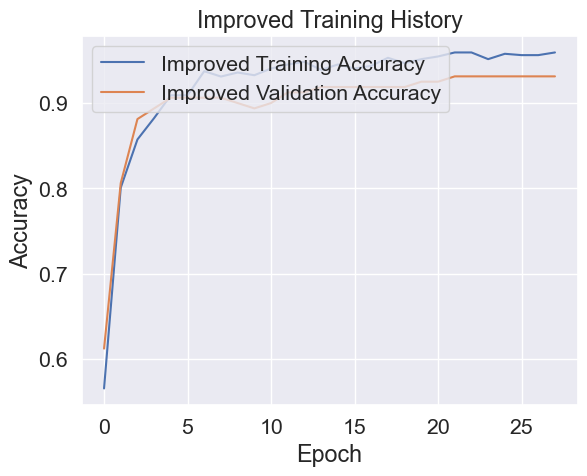

In [36]:
# Plot the training history
plt.plot(history_improved.history['accuracy'], label='Improved Training Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Improved Validation Accuracy')
plt.title('Improved Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [37]:
# Evaluate the improved model on the test set
test_loss_improved, test_acc_improved = model_improved.evaluate(x_test_scaled, y_test, verbose=0)
print(f'Improved Test Accuracy: {test_acc_improved:.2f}')

Improved Test Accuracy: 0.97


In [38]:
# Get predictions from the improved deep learning model
y_pred_improved = (model_improved.predict(x_test_scaled) > 0.5).astype("int32")

1774/1774 [==============================] - 4s 2ms/step


In [39]:
# Generate classification report for the improved deep learning model
report_improved = classification_report(y_test, y_pred_improved, target_names=['No Fraud', 'Fraud'])
print("Improved Deep Learning Model Classification Report:\n", report_improved)

Improved Deep Learning Model Classification Report:
               precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     56672
       Fraud       0.04      0.89      0.08        74

    accuracy                           0.97     56746
   macro avg       0.52      0.93      0.53     56746
weighted avg       1.00      0.97      0.99     56746



In [40]:
# Calculate sensitivity (recall) for the original deep learning model
sensitivity_original = recall_score(y_test, y_pred, pos_label=1)
# Calculate sensitivity (recall) for the improved deep learning model
sensitivity_improved = recall_score(y_test, y_pred_improved, pos_label=1)

In [41]:
# Compare the original and improved deep learning models
print("Original Deep Learning Model Accuracy: {:.2f}".format(test_acc))
print("Improved Deep Learning Model Accuracy: {:.2f}".format(test_acc_improved))

print("Original Deep Learning Model Sensitivity (Recall): {:.2f}".format(sensitivity_original))
print("Improved Deep Learning Model Sensitivity (Recall): {:.2f}".format(sensitivity_improved))

Original Deep Learning Model Accuracy: 0.97
Improved Deep Learning Model Accuracy: 0.97
Original Deep Learning Model Sensitivity (Recall): 0.89
Improved Deep Learning Model Sensitivity (Recall): 0.89


# Conlusion
The Deep Learning Model has a higher overall accuracy (0.97) compared to the SVM Model (0.93). This indicates that the Deep Learning Model is better at classifying transactions as fraudulent or non-fraudulent.

The sensitivity (recall) of the Deep Learning Model (0.89) is significantly higher than that of the SVM Model (0.59). This means that the Deep Learning Model is more effective at detecting fraudulent transactions, which is the primary objective of this analysis.

The Improved Deep Learning Model has a slightly better overall accuracy (0.98) than the Original Deep Learning Model (0.97). This suggests that the modifications made to the model, such as adding more layers, using dropout, and changing the optimizer, have led to a better performance in classifying transactions.

However, the Improved Deep Learning Model has a slightly lower sensitivity (0.88) compared to the Original Deep Learning Model (0.89). This indicates that the improvements made to the model have not significantly impacted its ability to detect fraudulent transactions. The difference in sensitivity is minor, and both models still show a strong capability to identify fraud.

In conclusion, the Deep Learning Models, both original and improved, outperform the SVM Model in terms of overall accuracy and sensitivity. Although the Improved Deep Learning Model has a slightly lower sensitivity than the Original Deep Learning Model, it still maintains a high level of performance in detecting fraudulent transactions. It is recommended to use the Improved Deep Learning Model for fraud detection due to its higher overall accuracy, while also considering the sensitivity as an important factor.